This presentation is for technical audience.

In [2]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
exam = pd.read_csv('exams.csv')

In [5]:
# Check some basic information
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [6]:
# Check missing values
exam.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values

In [10]:
# Check data types
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [55]:
# check number of columns and rows
exam.shape

(1000, 8)

Only the last 3 columns ('math score', 'reading score', 'writing score') are numeric values

In [11]:
# Create a variable for categorical variables
cat = exam.drop(['math score','reading score','writing score'],axis=1)
cat.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,male,group A,high school,standard,completed
1,female,group D,some high school,free/reduced,none
2,male,group E,some college,free/reduced,none
3,male,group B,high school,standard,none
4,male,group E,associate's degree,standard,completed


In [12]:
# Create a variable for numeric variabels
numeric = exam[['math score','reading score','writing score']]
numeric.head()

,math score,reading score,writing score
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68


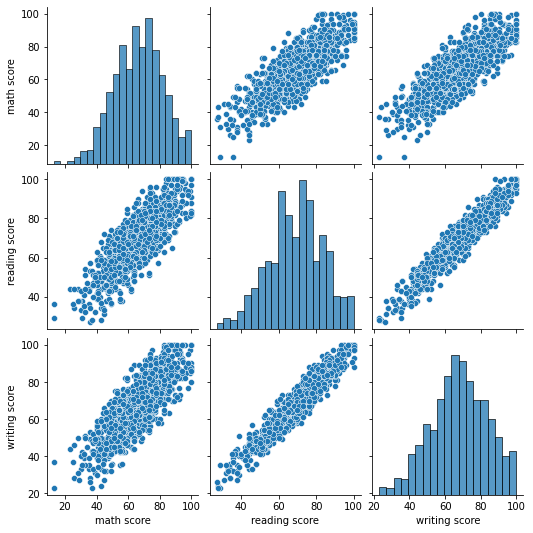

In [15]:
# Overview of numeric features
sns.pairplot(numeric)

- All 3 of the numeric features have normal distribution
- 'writing score' is positively correlated with 'math_score'
- 'reading score' is positively correlated with 'writing score'
- 'math score' is positively correlated with 'reading score'

<AxesSubplot:>

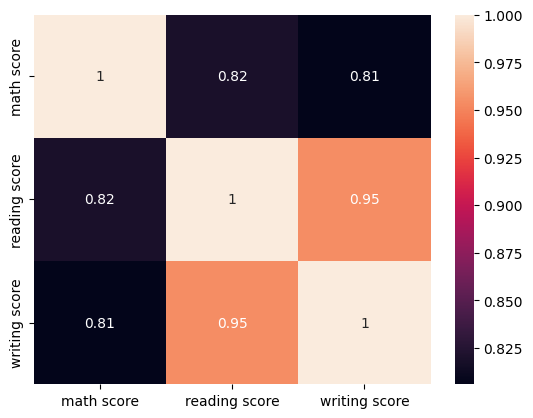

In [18]:
# Heatmap among numeric features
sns.heatmap(numeric.corr(), annot=True)

- 'writing score' is highly correlated with 'reading score'

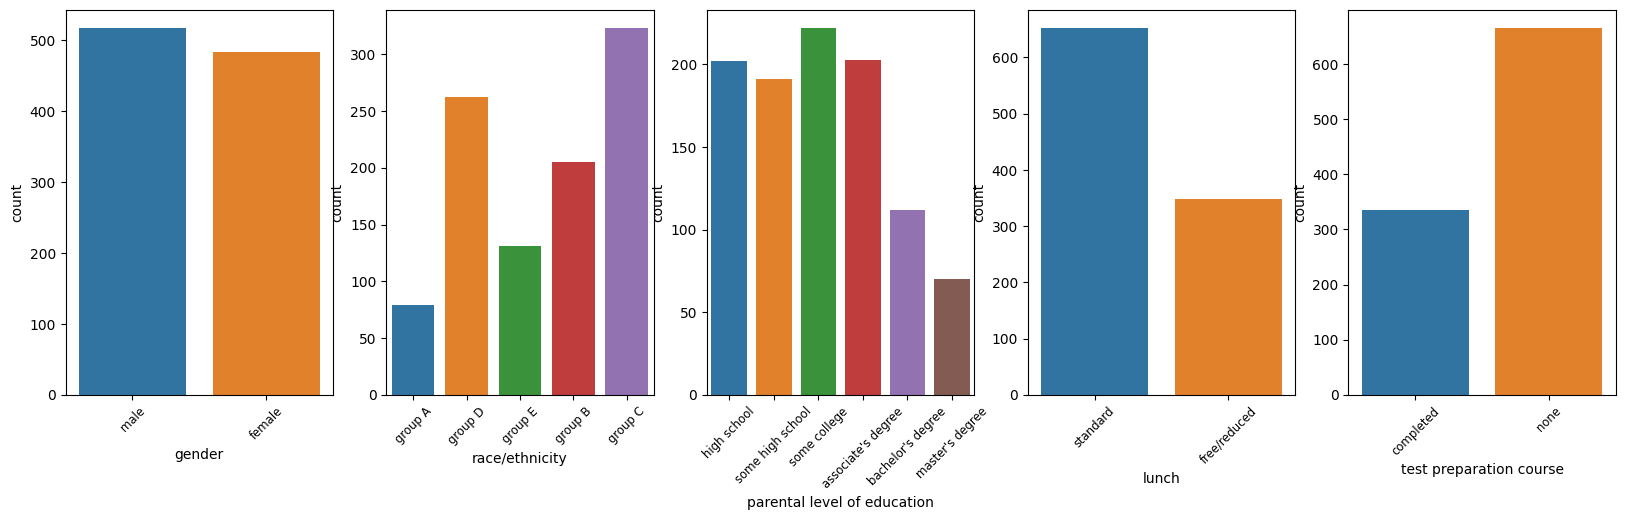

In [48]:
# Overview of categorical features
fig, ax = plt.subplots(figsize=(20,5),
                       nrows=1, ncols=len(cat.columns))

for i, col in enumerate(cat.columns):
    sns.countplot(data=exam, x=col, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45,labelsize='small')

plt.show()

- Similar number of males and females students
- Most parents have college education
- Most students belong to group c and group d in terms of race/ethnicity
- Almost double of students take standard lunch compared to free/reduced lunch
- Twice of students did not take test preparation course

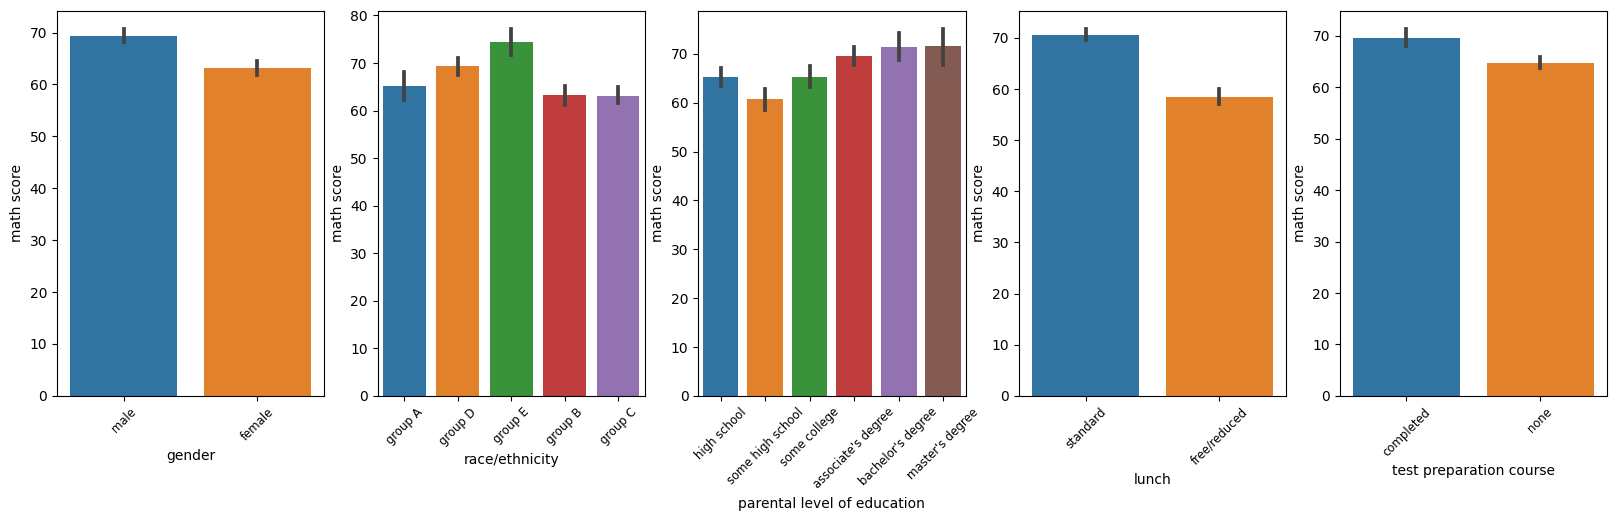

In [52]:
# Categorical features vs numeric features

# vs 'math score'

fig, ax = plt.subplots(figsize=(20,5),
                       nrows=1, ncols=len(cat.columns))

for i, col in enumerate(cat.columns):
    sns.barplot(x=cat[col], y=numeric['math score'], ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45,labelsize='small')
    
plt.show()

- For math scores, on average:
    - males score higher than females
    - group E students score the highest
    - students whose parents have higher education score higher in general
    - students taking standard lunch score higher
    - students who completed test preparation score have higher score

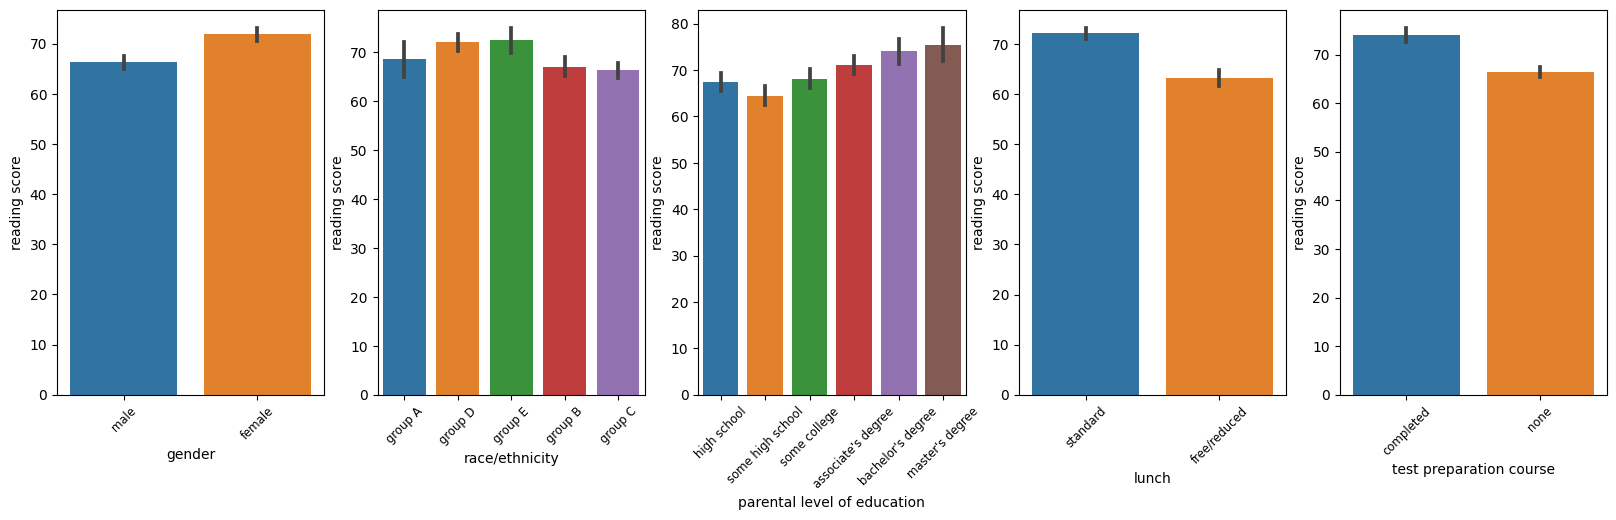

In [50]:
# vs 'reading score'

fig, ax = plt.subplots(figsize=(20,5),
                       nrows=1, ncols=len(cat.columns))

for i, col in enumerate(cat.columns):
    sns.barplot(x=cat[col], y=numeric['reading score'], ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45,labelsize='small')
    
plt.show()

- For reading scores, on average:
    - females score higher than males
    - group D and group E students score the highest
    - students whose parents have higher education score higher in general
    - students taking standard lunch score higher
    - students who completed test preparation score have higher score

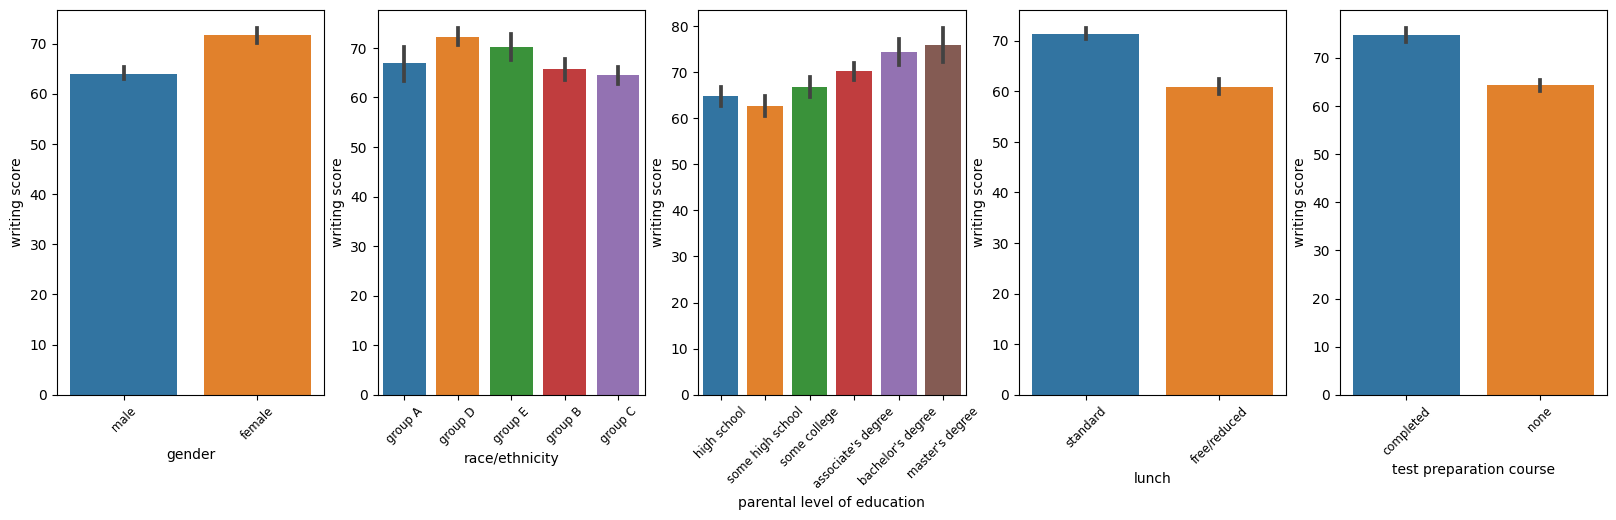

In [51]:
# vs 'writing score'

fig, ax = plt.subplots(figsize=(20,5),
                       nrows=1, ncols=len(cat.columns))

for i, col in enumerate(cat.columns):
    sns.barplot(x=cat[col], y=numeric['writing score'], ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45,labelsize='small')
    
plt.show()

- For writing scores, on average:
    - females score higher than males
    - group D students score the highest
    - students whose parents have higher education score higher in general
    - students taking standard lunch score higher
    - students who completed test preparation score have higher score

In [56]:
# Review categorical features vs 3 different scores

In [57]:
# gender
gender = exam[['gender',
               'math score',
               'reading score',
               'writing score']].groupby('gender').mean().sort_values(by='math score',ascending=False)
gender

,math score,reading score,writing score
gender,,,
male,69.384913,66.305609,64.029014
female,63.196687,71.888199,71.708075


- Males score higher in average in math
- Females score higher in reading and writing in average

In [58]:
# race/ethnicity
race = exam[['race/ethnicity',
               'math score',
               'reading score',
               'writing score']].groupby('race/ethnicity').mean().sort_values(by='math score',ascending=False)
race

,math score,reading score,writing score
race/ethnicity,,,
group E,74.465649,72.526718,70.213740
group D,69.267176,72.087786,72.259542
group A,65.215190,68.556962,66.974684
group B,63.170732,67.102439,65.736585
group C,63.130031,66.383901,64.523220


- Group E score highest on math, reading on average
- Group D score highest on writing on average
- Group C score lowest on all three on average

In [59]:
# parental level of education
parent_edu = exam[['parental level of education',
               'math score',
               'reading score',
               'writing score']].groupby('parental level of education').mean().sort_values(by='math score',ascending=False)
parent_edu

,math score,reading score,writing score
parental level of education,,,
master's degree,71.585714,75.428571,75.885714
bachelor's degree,71.491071,74.008929,74.410714
associate's degree,69.536946,70.985222,70.113300
some college,65.297297,68.045045,66.734234
high school,65.207921,67.400990,64.846535
some high school,60.701571,64.408377,62.539267


- Students whose parents achive master's degree score highest on math, reading, and writing on average
- Students whose parents achive some high school degree score lowest on math, reading, and writing on average

In [60]:
# lunch
lunch = exam[['lunch',
               'math score',
               'reading score',
               'writing score']].groupby('lunch').mean().sort_values(by='math score',ascending=False)
lunch

,math score,reading score,writing score
lunch,,,
standard,70.607362,72.104294,71.374233
free/reduced,58.505747,63.189655,60.925287


Students taking standard lunch score higher on average on all 3 subjects

In [61]:
# test preparation course
test_prep = exam[['test preparation course',
               'math score',
               'reading score',
               'writing score']].groupby('test preparation course').mean().sort_values(by='math score',ascending=False)
test_prep

,math score,reading score,writing score
test preparation course,,,
completed,69.686567,74.089552,74.671642
none,64.738346,66.439098,64.245113


Students who took test preparation course on average score higher on all 3 subjects